# Split-apply-combine

Split-apply-combine is a common workflow when analysing data. Given a dataset D, we split it based on some column, producing a set of datasets $d_i$. Then we apply some operation to each dataset $d_i$ separately, and finally we combine the results into an output dataset.

Lets dive in. We start by loading the iris dataset that we used previously:

In [7]:
import pandas as pd
import os.path
#d = pd.read_csv('../data/iris.csv', dtype={'Name': 'category'})
d = pd.read_csv('/m/jhnas/jupyter/shareddata/python-r-data-analysis/iris.csv', dtype={'Name': 'category'})
d.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now, split the dataframe d based on the 'Name' field, and calculate the averages of each group, and generate a dataframe with this average data. *Hint*: Check out the groupby() method on dataframes.

In [8]:
d.groupby('Name').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Next, look at the descriptive statistics for the sepal length split by name:

In [3]:
d.groupby('Name')['SepalLength'].describe()

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


We can also easily plot such a dataframe which has been grouped by some variable. Pandas does contain an interface to matplotlib for many of the basic plots, for more advanced functionality one can use matplotlib directly. Plot the sepal lengths including descriptive statistics grouped by name (recall that when plotting, the magic %matplotlib inline makes the plots appear inline in the notebook):

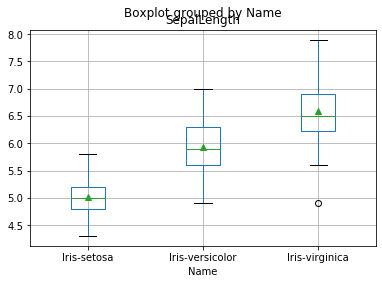

In [9]:
%matplotlib inline
d.boxplot(column=['SepalLength'], by='Name', showmeans=True)

A more rigorous treatment would include doing some statistical testing of the data. E.g. t-test:

In [5]:
import scipy.stats as stats
sl = []
for grname, gr in d.groupby('Name'):
    sl.append(gr['SepalLength'])
stats.ttest_ind(sl[0], sl[1])

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

To test the interaction of all groups with each other, the ANOVA test is a generalization of the t-test:

In [6]:
stats.f_oneway(*sl)

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [7]:
stats.f_oneway(sl[0], sl[1])

F_onewayResult(statistic=110.69115204195691, pvalue=8.985235037487287e-18)

For more information about split-apply-combine see
[doi:10.18637/jss.v040.i01](https://www.jstatsoft.org/article/view/v040i01)